In [51]:
import pandas as pd

rw = pd.read_csv('data/winequality-red.csv',sep=';')
ww = pd.read_csv('data/winequality-white.csv',sep=';')

In [52]:
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
rw_df = rw[['alcohol', 'residual sugar', 'pH']]
rw_df.rename(columns={'residual sugar':'sugar'}, inplace=True)

C:\Users\2-13\AppData\Local\Temp\ipykernel_13848\468607105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw_df.rename(columns={'residual sugar':'sugar'}, inplace=True)


In [55]:
rw_df.head()

,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51


In [56]:
rw_df['class'] = 0
#rw_df.head()

C:\Users\2-13\AppData\Local\Temp\ipykernel_13848\2845689859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw_df['class'] = 0


In [73]:
ww_df = ww[['alcohol', 'residual sugar', 'pH']]
ww_df.rename(columns={'residual sugar':'sugar'}, inplace=True)

ww_df['class'] = 1
#ww_df.head()

C:\Users\2-13\AppData\Local\Temp\ipykernel_13848\906074259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ww_df.rename(columns={'residual sugar':'sugar'}, inplace=True)
C:\Users\2-13\AppData\Local\Temp\ipykernel_13848\906074259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ww_df['class'] = 1


In [74]:
wine = pd.concat([rw_df, ww_df])

In [75]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


# TREE

In [76]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [77]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2,random_state=42)

In [78]:
#tree에서는 선형회귀 다음 표준화 작업을 하지 않음

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target) #왜 타겟값이 들어가는지 생각해라


DecisionTreeClassifier()

In [81]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8607692307692307


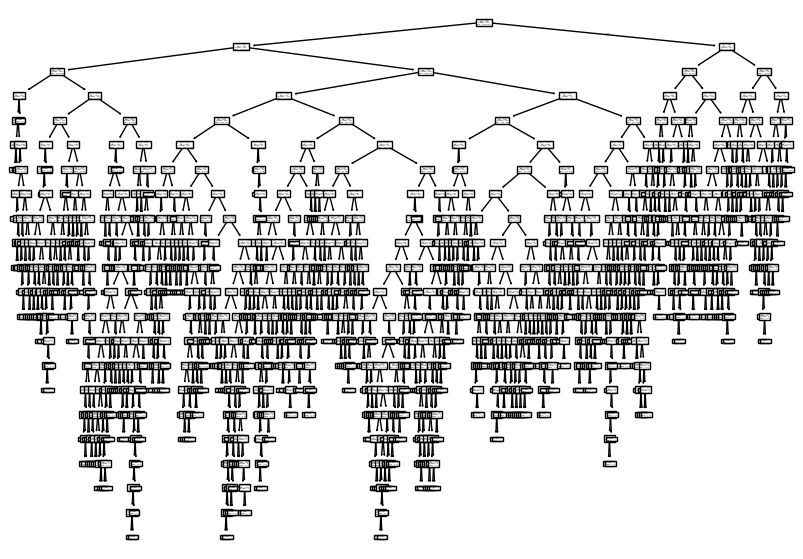

In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

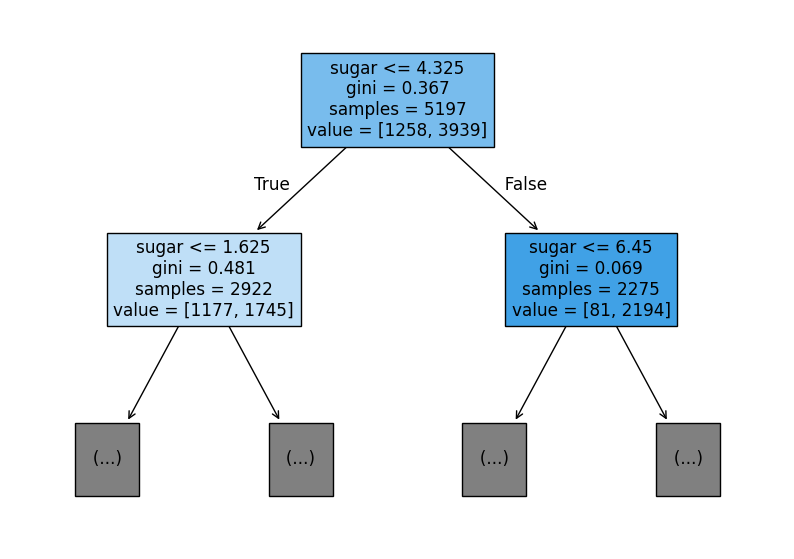

In [85]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, feature_names=['alcohol', 'sugar', 'pH'], filled=True)
plt.show()

In [87]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


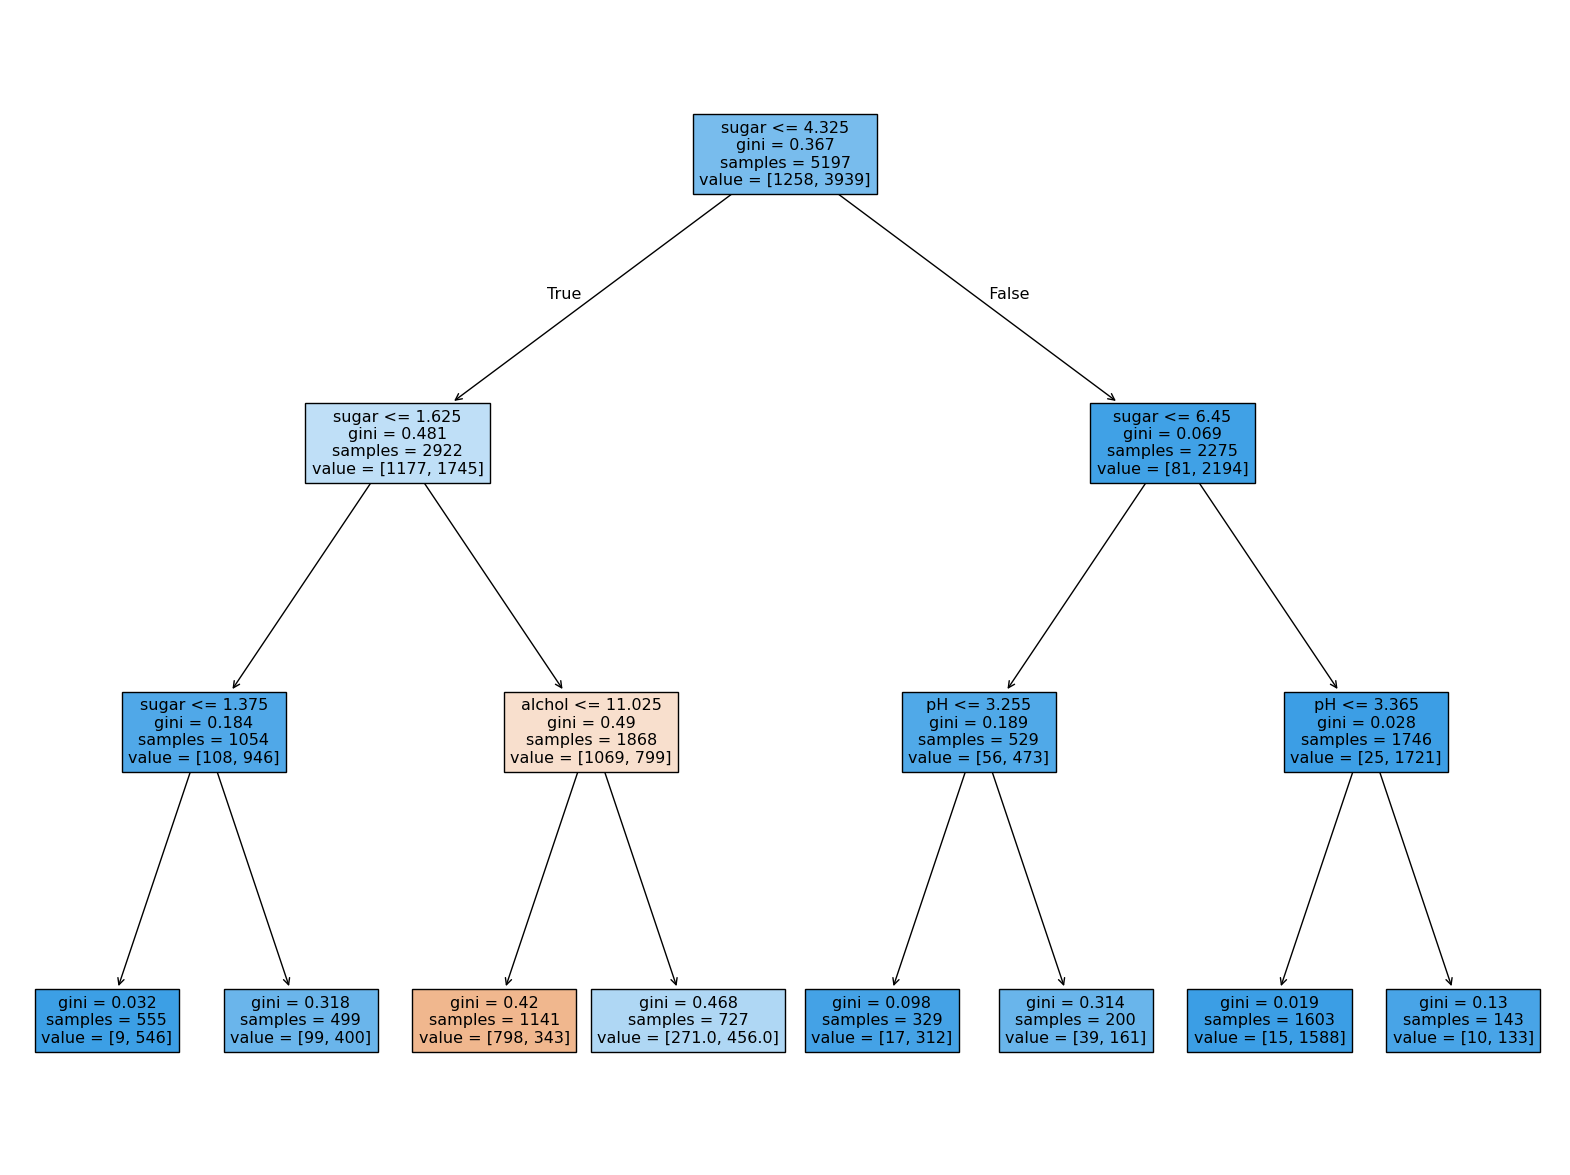

In [89]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()